Importing Libraries ::------------------------

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_user_data.csv")
df.head()

C:\Users\Vaishnav Divij\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [3]:
df.columns

Index(['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'bounces',
       'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions',
       'source', 'medium', 'campaign', 'deviceCategory', 'operatingSystem',
       'mobileDeviceModel', 'city', 'ChannelGrouping'],
      dtype='object')

In [4]:
df.describe()

,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions
count,464439.000000,4.644390e+05,4.644390e+05,232178.0,464387.000000,231612.000000,6.308000e+03,6308.000000
mean,2.334040,2.017042e+07,1.492485e+09,1.0,3.772011,279.921610,1.617053e+08,1.046449
std,9.879354,2.006430e+02,5.279611e+06,0.0,6.403579,492.292307,9.034953e+08,0.531457
min,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000
25%,1.000000,2.017022e+07,1.487899e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000
50%,1.000000,2.017042e+07,1.492441e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000
75%,1.000000,2.017061e+07,1.497075e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,466.000000,12136.000000,4.708206e+10,25.000000


Data Cleaning and Data Wrangling::--------------------------------------

In [5]:
df['VisitStartTime'] = pd.to_datetime(df['VisitStartTime'],unit='s')

In [6]:
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [7]:
df['year'] = df['VisitStartTime'].dt.year
df['month'] = df['VisitStartTime'].dt.month
df['day'] = df['VisitStartTime'].dt.day
df['hour'] = df['VisitStartTime'].dt.hour
df['minute'] = df['VisitStartTime'].dt.minute

In [8]:
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,...,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping,year,month,day,hour,minute
0,785078151568671210,1,20170427,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search,2017,4,27,22,13
1,142102319075727733,1,20170427,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,18,11
2,1015855318272495035,1,20170427,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,12,11
3,7452646484470618802,1,20170427,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,13,22
4,1985244892543433393,3,20170427,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,16,11


In [9]:
# replace NaN with 0
df['bounces'].fillna(0, inplace=True)

df['pageviews'].fillna(0, inplace=True)

df['timeOnSite'].fillna(0, inplace=True)

In [10]:
# Removing unnecessary columns
df = df.drop(['fullVisitorId', 'Date', 'mobileDeviceModel'], axis=1)

In [11]:
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2017,4,27,18,11
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,12,11
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,13,22
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,16,11


In [12]:
df['city'].value_counts()

not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
                                  ...  
Kumamoto                              5
Boise                                 3
Pryor                                 3
Bozeman                               3
Saratoga                              3
Name: city, Length: 436, dtype: int64

In [13]:
# replacing "not available in demo dataset" and "(not set)" by "Unavailable"
df['city'].replace('not available in demo dataset', 'Unavailable', inplace=True)
df['city'].replace('(not set)', 'Unavailable', inplace=True)

In [14]:
%%time

# Transaction_Amt and Transactions_Total 
for i in range(0, len(df), 1):
    if (pd.isna(df.iloc[i, 7])) and (pd.notna(df.iloc[i, 8])):
        print('ERROR: totalTransactionRevenue missing when transactions not null at row ', i)

    if (pd.isna(df.iloc[i, 8])) and (pd.notna(df.iloc[i, 7])):
        print('ERROR: transactions missing when totalTransactionRevenue is not null at row ', i)

Wall time: 14.3 s


In [15]:
#Replace NaN with 0
df['totalTransactionRevenue'].fillna(0,inplace=True)
df['transactions'].fillna(0,inplace=True)

In [16]:
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11


In [17]:
# target variable 'transaction', 1 = transaction, 0 = no transaction.
df['transaction'] = np.where(df['transactions']  == 0, '0', '1')
df['transaction'] = df['transaction'].astype('str')

In [18]:
# TransactionRevenue is totals_totalTransactionRevenue / 1000000
df['transactionRevenue'] = df['totalTransactionRevenue'] / 1000000

In [19]:
# the following columns not needed after this stage
df = df.drop(['VisitStartTime','totalTransactionRevenue','year'],axis=1)

In [20]:
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,month,day,hour,minute,transaction,transactionRevenue
0,1,1.0,1.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,4,27,22,13,0,0.0
1,1,1.0,1.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Unavailable,Organic Search,4,27,18,11,0,0.0
2,1,1.0,1.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,4,27,12,11,0,0.0
3,1,1.0,1.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,4,27,13,22,0,0.0
4,3,1.0,1.0,0.0,0.0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,4,27,16,11,0,0.0


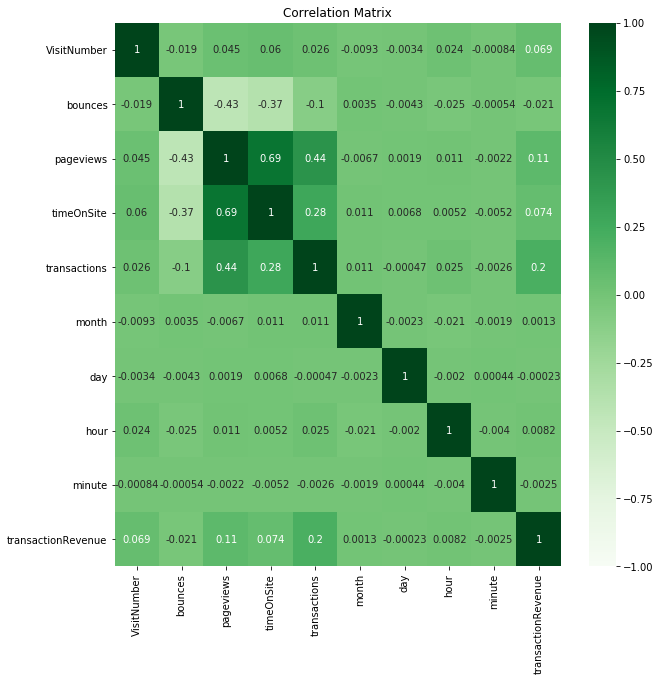

In [21]:
fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Matrix')
df.corr()
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'Greens', annot=True);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   VisitNumber         464439 non-null  int64  
 1   bounces             464439 non-null  float64
 2   pageviews           464439 non-null  float64
 3   timeOnSite          464439 non-null  float64
 4   transactions        464439 non-null  float64
 5   source              464439 non-null  object 
 6   medium              464439 non-null  object 
 7   campaign            464439 non-null  object 
 8   deviceCategory      464439 non-null  object 
 9   operatingSystem     464439 non-null  object 
 10  city                464439 non-null  object 
 11  ChannelGrouping     464439 non-null  object 
 12  month               464439 non-null  int64  
 13  day                 464439 non-null  int64  
 14  hour                464439 non-null  int64  
 15  minute              464439 non-nul

In [23]:
#To convert categorical variables to integer using label encoder
labEnc = LabelEncoder()

cols = ["ChannelGrouping", "city", "operatingSystem", 
        "campaign", "medium", "source"]

col_lessLabels = ["deviceCategory"]

for col in cols:
    df[col] = labEnc.fit_transform(df[col])
    
df = pd.get_dummies(df, columns = col_lessLabels)

Feature Engineering ::----------------------------------

In [24]:
features = ['VisitNumber', 'bounces', 'pageviews', 'timeOnSite', 'source',
            'medium', 'campaign', 'operatingSystem', 'city',
            'ChannelGrouping', 'month', 'day', 'hour', 'deviceCategory_desktop', 'deviceCategory_mobile']

# Features
X = df[features] 

# Target variable
y = df.transaction

Apply Machine Learning Model::-------------------------------------

In [25]:
# Split the data into training set and testing set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
%%time

# Decision Tree classifer object
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

Wall time: 2.56 s


In [27]:
%%time

#Predict for test dataset
y_pred = clf.predict(X_test)

Wall time: 24 ms


In [28]:
# checking the accuracy of the model
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.9803634484540522


In [29]:
# generating confusion matrix
confusion_matrix(y_test, y_pred)

array([[90640,  1003],
       [  821,   424]], dtype=int64)

In [32]:
print('Recall = ', (90640 / (90640 + 1003)))

Recall =  0.989055356110123


In [33]:
print('Precision = ', (90640 / (90640 + 821)))

Precision =  0.9910234963536371
